# SMAI Assignment - 2

## Question 3: Face Recognition using Principal Component Analysis

This question requires you to create a basic facial recognition system using a technique called principal component analysis (PCA)
by projecting the face images on the feature space (face space) which best
represents the variations among distinct faces. The face space is defined as the
“Eigenfaces", which are the eigenvectors of the set of faces.

The goal of implementing this system is to recognize a person's face by comparing it to a pre-existing database of faces, and identifying the closest match.

Link to paper on Eigenfaces: [https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf](https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf)

The AT&T face dataset contains a set of grayscale face images with dimensions 92x112. The images are organised in 40 directories (one for each subject), which have names of the form sX, where X indicates the subject number (between 1 and 40). In each of these directories, there are ten different images of that subject, which have names of the form Y.pgm, where Y is the image number for that subject (between 1 and 10). These 10 images per person are taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement). <b>Link:</b> [https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/](https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/)

#### Tasks
1. Load dataset and divide the date into training and test sets.
2. Implement the PCA algorithm from scratch.
3. Implement image reconstruction using the eigen projections and visualise differences for different number of components.
4. Visualise the mean(Eigen face) generated.
5. Given training set, obtain accuracy by attempting a face regonition module and obtaining the accuracy for different number of principal components.

In [4]:
!unzip /content/ATnT/ATnT.zip

Archive:  /content/ATnT/ATnT.zip
   creating: ATnT/s39/
  inflating: ATnT/s39/10.pgm         
  inflating: ATnT/s39/9.pgm          
  inflating: ATnT/s39/8.pgm          
  inflating: ATnT/s39/2.pgm          
  inflating: ATnT/s39/7.pgm          
  inflating: ATnT/s39/1.pgm          
  inflating: ATnT/s39/6.pgm          
  inflating: ATnT/s39/5.pgm          
  inflating: ATnT/s39/4.pgm          
  inflating: ATnT/s39/3.pgm          
   creating: ATnT/s16/
  inflating: ATnT/s16/6.pgm          
  inflating: ATnT/s16/10.pgm         
  inflating: ATnT/s16/9.pgm          
  inflating: ATnT/s16/8.pgm          
  inflating: ATnT/s16/2.pgm          
  inflating: ATnT/s16/7.pgm          
  inflating: ATnT/s16/1.pgm          
  inflating: ATnT/s16/5.pgm          
  inflating: ATnT/s16/4.pgm          
  inflating: ATnT/s16/3.pgm          
   creating: ATnT/s18/
  inflating: ATnT/s18/10.pgm         
  inflating: ATnT/s18/9.pgm          
  inflating: ATnT/s18/8.pgm          
  inflating: ATnT/s18/2.

#### Import Libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
import cv2
from copy import copy
from tqdm import tqdm

#### Import Dataset
Assign labels for the images based on the subdirectories to obtain X(images array) and y (labels).

Ensure that the test data contains atleast one image from each category.

In [6]:
# iterate through all folders, load each image

trainAmt = 0.9
allFaces = []
labels = []

for i in range(1,41):
    for j in range(1,11):
        imgPath = os.path.join("/content/ATnT", "s" + str(i), str(j) + ".pgm")
        img = cv2.imread(imgPath, -1)

        allFaces.append(img)
        labels.append(i)

# shuffle
randomOrder = np.random.permutation(len(labels))
allFaces = np.array(allFaces)[randomOrder]
labels = np.array(labels)[randomOrder]

# split
trainFaces = allFaces[:int(trainAmt*len(allFaces))]
trainLabels = labels[:int(trainAmt*len(allFaces))]

testFaces = allFaces[int(trainAmt*len(allFaces)): ]
testLabels = labels[int(trainAmt*len(allFaces)): ]

# 112x92 (= 10304) grayscale images,  360 in train, 40 in test
print(trainFaces.shape, trainLabels.shape)

(360, 112, 92) (360,)


#### Task 2: Implement PCA Algorithm.

Explain your steps with comments and write a brief explanation of the method.

In [7]:
# take input data X
def principalComponentAnalysis(X):
    """
    Implement pca in the following function by taking the following arguements:
    1. X(images array)
    2. number of components
    The function must return the eigen vectors (principal components) also termed "Eigen faces"
    """


    print(X.shape)
    # your code here
    mean = np.mean(X, axis=0)
    print(mean.shape)

    # bring mean of data to origin
    origin_mean_X = X - mean
    # find covariance of features in this case pixel values, rowvar = false tells features are at columns
    covariance = np.cov(origin_mean_X, rowvar = False)
    print(covariance.shape)
    # find eigenValues and eigenVectors of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eigh(covariance)
    print(eigenvectors.shape)
    # row_eigenvectors = eigenvectors.T
    # print(row_eigenvectors.shape)
    # Sort eigenVectors in decreasing order of eigenValues
    sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort indices in descending order
    # sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    print(eigenvectors.shape, eigenvectors.shape, sorted_eigenvectors.shape)
    return sorted_eigenvectors.T

    # so finally we get eigenvectors that is principal components with highest variance at start

calculate *eigenface*

In [8]:
# flatten images
n, h, w = trainFaces.shape
# train_2d = [image.flatten() for image in trainFaces]
train_2d = trainFaces.reshape(trainFaces.shape[0],-1)
test_2d = testFaces.reshape(testFaces.shape[0],-1)


In [9]:
print(train_2d.shape)

(360, 10304)


In [10]:
# calculate eigen faces
n, d = train_2d.shape
eigenFaces = principalComponentAnalysis(train_2d)
print(eigenFaces.shape)
# eigenFaces = eigenFaces.reshape(d, h, w)

(360, 10304)
(10304,)
(10304, 10304)
(10304, 10304)
(10304, 10304) (10304, 10304) (10304, 10304)
(10304, 10304)


In [11]:
# train images mean
train_mean = np.mean(train_2d, axis=0)
# project train images on eigenvectors
projected_trainFaces = np.dot(train_2d - train_mean, eigenFaces.T)

In [12]:
eigenFaces_3d = eigenFaces.reshape(d, h, w)


In [13]:
print(eigenFaces.shape)

(10304, 10304)


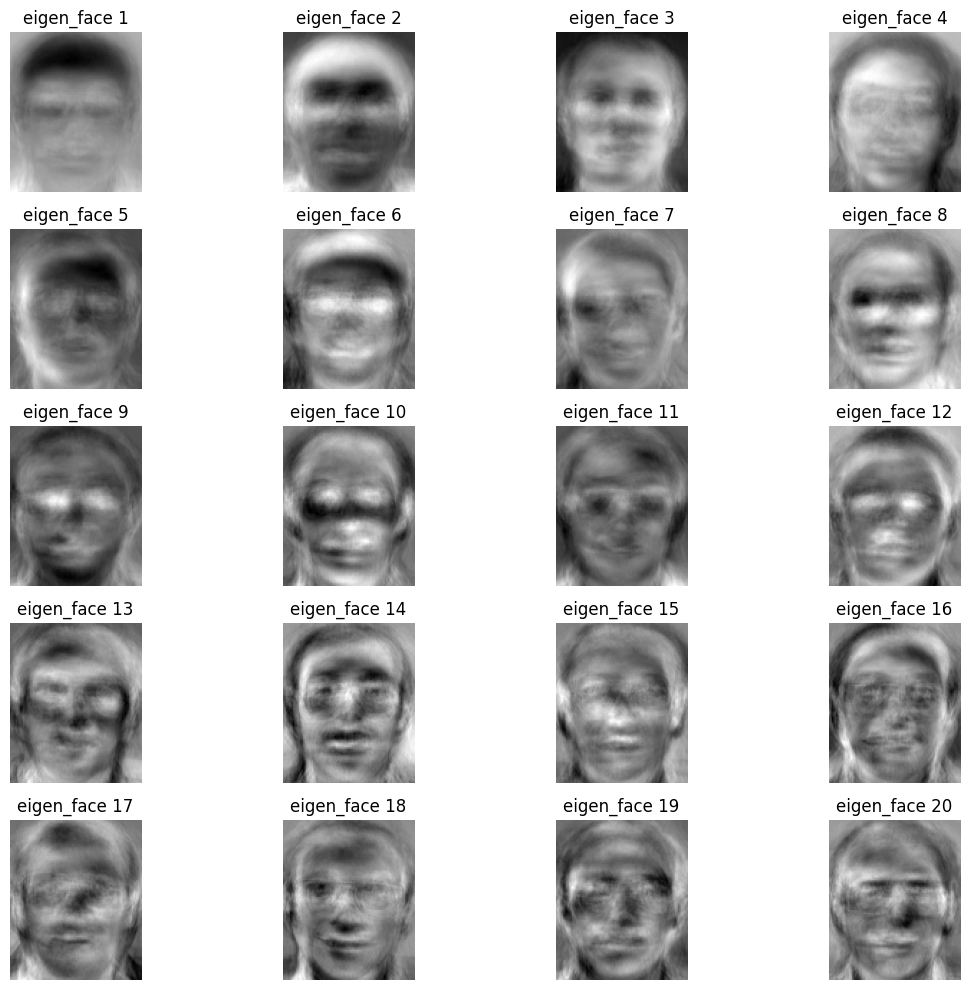

In [14]:
# plot the eigen faces
%matplotlib inline
rows = 5
cols = 4
fig, axes = plt.subplots(rows, cols, figsize=(12, 10))

for i in range(rows):
    for j in range(cols):
        index = i * cols + j
        # if index < num_images:
        axes[i, j].imshow(eigenFaces_3d[index], cmap='gray')  # Use 'gray' colormap for grayscale images
        axes[i, j].axis('off')  # Turn off axis
        axes[i, j].set_title(f'eigen_face {index + 1}')  # Add title with image index

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

Task 4: mean eigenface

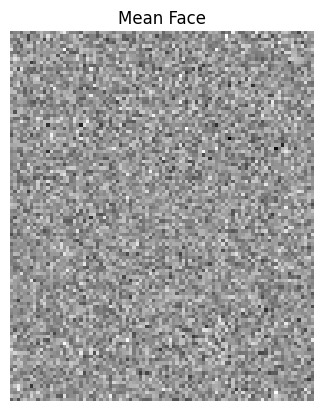

In [18]:
# plt.imshow(np.mean(eigenvectors[:,:400], axis=1).reshape(112, 92), cmap='gray')  # Assuming you want a grayscale image
mean_eigenface = np.mean(eigenFaces_3d, axis=0)
plt.imshow(mean_eigenface, cmap='gray')
plt.imshow(np.mean(eigenvectors, axis=1).reshape(112, 92), cmap='gray')
plt.title('Mean Face')
plt.axis('off')  # Turn off axis
plt.show()

#### Task 3: Implement Image Reconstruction from Eigenfaces


Explain your steps with comments and write a brief explanation of the method.

In [19]:
def imageReconstruction(testFace_1d, eigenFaces_2d):
    """
    Helper function to reconstruct images
    """

    # your code here
    # 1. subtract the mean from test face
    transformed_test_face = testFace_1d - train_mean

    # 2. project the test face on k selected eigen vectors to get projected face with k dimensions in eigen vector
    projected_face = np.dot(transformed_test_face, eigenFaces_2d.T)

    # 3. reconstruct the face in original coordinate system by exapanding each value in eigen dimension to original dimesions
    reconstructed_face = np.dot(projected_face, eigenFaces_2d)

    return reconstructed_face

In [20]:
# plot recontructions here
%matplotlib inline

def plot_images(reconstructed_images, original_image, components, image_label):

  plt.figure(figsize=(12, 10))
  plt.subplot(4, 4, 1)
  plt.axis('off')
  plt.imshow(original_image, cmap='gray')
  plt.title(f'Original Image {image_label}')

  # Plotting the reconstructed images
  for i in range(len(reconstructed_images)):
      plt.subplot(4, 4, i + 2)
      plt.imshow(reconstructed_images[i], cmap='gray')
      plt.title(f'Component {components[i]}')

  plt.tight_layout()
  plt.show()

#### Visualisation
Visualise the results for different number of factors(pc = 5, 10, 50, 100, etc.)

**Note:** Ensure that the images are labelled appropriately.

In [21]:
%matplotlib inline
import random
def displayNfactors():

    # your code here
    components = [10,20,40,80,160, 320, 640, 1280, 10000]
    random_int = random.randint(0, train_2d.shape[0]-1)

    res_images = []
    for k in components:
      reconstructed_image = imageReconstruction(train_2d[random_int], eigenFaces[:k, :])
      res_images.append(reconstructed_image.reshape(h,w))

    plot_images(res_images, train_2d[random_int].reshape(h,w), components, random_int)
    return None


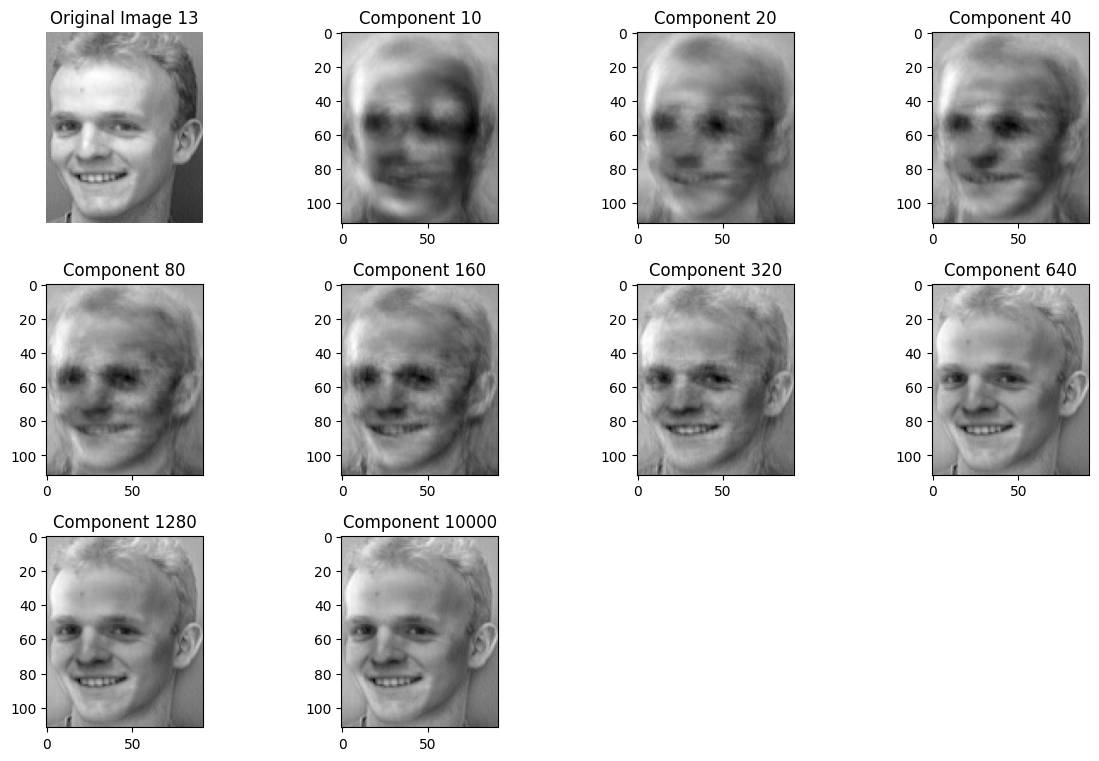

In [22]:
displayNfactors()

#### Implement face recognition module based on the norm
Explain your steps with comments and write a brief explanation of the method.

*   Test the module and report accuracies based on the number of components taken for a range of value and plot them.
*   Also plot the mean square error vs the number of eigenvectors taken and report your observations.
*   For further empirical analysis, plot the semi-log variant of the error plot obtained above.

In [23]:
def getClass(test_2d, numComponents):
    """
    Arguments:
    1. Test image
    2. Eigenvectors
    3. Mean Eigen Face
    4. Training Set(X_train,y_train)

    The function must return the following:
    1. image with smallest error
    2. error value
    3. prediction class
    """


    # project test_images on new eigenfaces coordinate system
    projected_testFace = np.dot(test_2d - train_mean, eigenFaces[:numComponents, :].T)

    # find euclidiean distance of each projected test face with projected train faces
    distances = np.linalg.norm(projected_trainFaces[:, :numComponents] - projected_testFace, axis=1)
    # find index of train images with which min distance is found.
    # This train image is classified as the label of the given test image
    nearest_index = np.argmin(distances)

    # find the dimensions of projected test face in the original coordiante system to find MSE
    reconstructed_face = np.dot(projected_testFace, eigenFaces[:numComponents, :])

    mse = np.mean((test_2d -train_mean - reconstructed_face)**2)
    return trainFaces[nearest_index], mse, trainLabels[nearest_index]

    # return None

Iterate through all the images in the test data and test the accuracy by taking different number of components

In [24]:
components = [3,5,10,20,30,40,50]
mse_arr = []
accuracy = []

for numComponents in components:
    success, cur_mse = 0, 0
    for index, image in enumerate(test_2d):
      predicted_image, mse, label = getClass(image, numComponents)
      cur_mse += mse
      if label == testLabels[index]: success+=1
    accuracy.append(success/test_2d.shape[0])
    # mse = np.mean((test_2d - train_mean - np.dot(projection_of_test, pc.T)) ** 2)

    mse_arr.append(cur_mse/test_2d.shape[0])
    # your code here

Plot Number of eigenvectors vs Mean Square Error

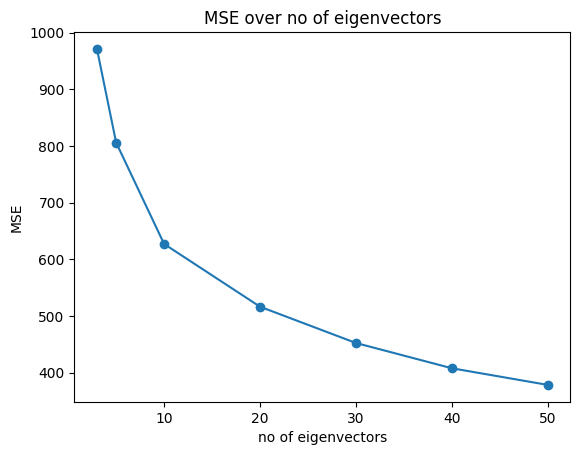

In [25]:
# your code here
plt.plot(components, mse_arr, marker='o', linestyle='-')
plt.title('MSE over no of eigenvectors')
plt.xlabel('no of eigenvectors')
plt.ylabel('MSE')
# plt.grid(True)
plt.show()


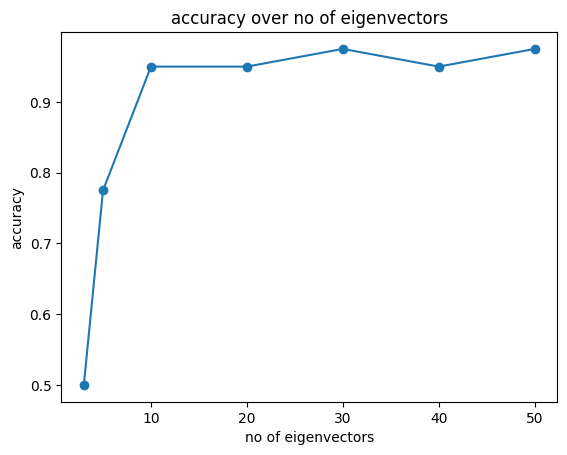

In [26]:
plt.plot(components, accuracy, marker='o', linestyle='-')
plt.title('accuracy over no of eigenvectors')
plt.xlabel('no of eigenvectors')
plt.ylabel('accuracy')
# plt.grid(True)
plt.show()


Plot Number of eigenvectors vs Logarithmic Mean Square Error

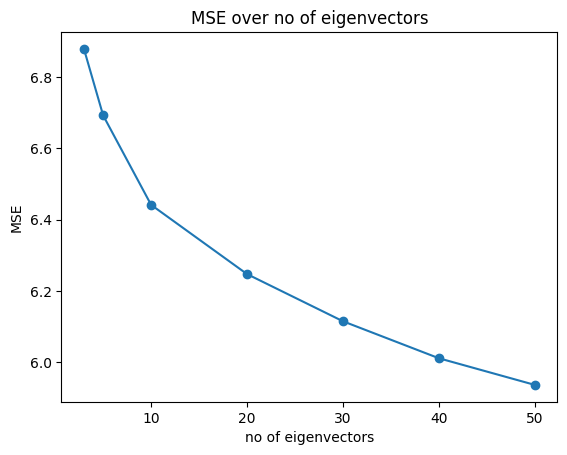

In [27]:
# your code here
plt.plot(components, np.log(mse_arr), marker='o', linestyle='-')
plt.title('MSE over no of eigenvectors')
plt.xlabel('no of eigenvectors')
plt.ylabel('MSE')
# plt.grid(True)
plt.show()


Semi-log plot of MSE

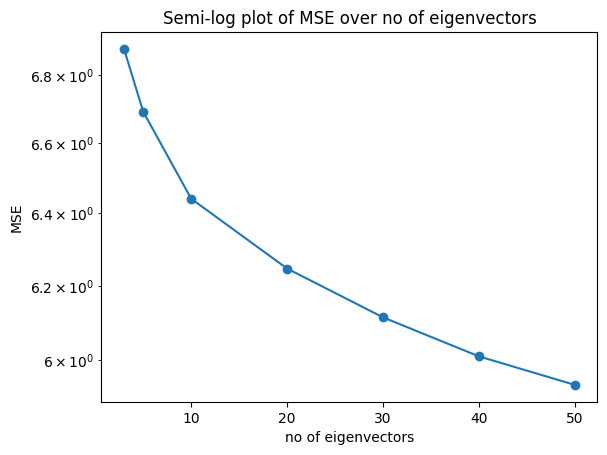

In [28]:
plt.semilogy(components, np.log(mse_arr), marker='o', linestyle='-')
plt.title('Semi-log plot of MSE over no of eigenvectors')
plt.xlabel('no of eigenvectors')
plt.ylabel('MSE')
# plt.grid(True)
plt.show()